In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, recall_score, f1_score, 
                             confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc)
import shap


In [2]:
# Charger les données
data = pd.read_csv("churn_clients.csv")

# Afficher les premières lignes des données
print(data.head())

   Age  Revenu   Sexe  Anciennete  Frequence_utilisation Support_contacte  \
0   56    4343  Femme           8                     23              Oui   
1   69    5070  Homme           9                     26              Oui   
2   46    1580  Femme           8                     10              Non   
3   32    8004  Homme           9                     29              Oui   
4   60    9130  Homme           9                      1              Non   

   Score_satisfaction  Resilie  
0                   2        0  
1                   2        0  
2                   3        0  
3                   3        0  
4                   1        0  


In [4]:
# Nombre de clients et colonnes
num_clients, num_columns = data.shape
print(f"Nombre de clients : {num_clients}")
print(f"Colonnes : {data.columns.tolist()}")

Nombre de clients : 500
Colonnes : ['Age', 'Revenu', 'Sexe', 'Anciennete', 'Frequence_utilisation', 'Support_contacte', 'Score_satisfaction', 'Resilie']


In [5]:
# Vérifier les valeurs manquantes
missing_values = data.isnull().sum()
print("Valeurs manquantes par colonne :")
print(missing_values[missing_values > 0])  # Afficher uniquement les colonnes avec des valeurs manquantes

Valeurs manquantes par colonne :
Series([], dtype: int64)


In [6]:
# Afficher les statistiques descriptives pour identifier les colonnes à normaliser
print(data.describe())

              Age       Revenu  Anciennete  Frequence_utilisation  \
count  500.000000   500.000000  500.000000             500.000000   
mean    44.220000  5651.412000    4.482000              13.826000   
std     15.036082  2525.112336    2.924171               8.596716   
min     18.000000  1005.000000    0.000000               0.000000   
25%     32.000000  3530.250000    2.000000               6.000000   
50%     45.000000  5827.500000    4.000000              14.000000   
75%     57.000000  7884.250000    7.000000              21.000000   
max     69.000000  9989.000000    9.000000              29.000000   

       Score_satisfaction     Resilie  
count           500.00000  500.000000  
mean              5.50400    0.050000  
std               2.82807    0.218163  
min               1.00000    0.000000  
25%               3.00000    0.000000  
50%               5.50000    0.000000  
75%               8.00000    0.000000  
max              10.00000    1.000000  


In [7]:
# Afficher les valeurs uniques des colonnes catégorielles
print(data['Sexe'].unique())
print(data['Support_contacte'].unique())

['Femme' 'Homme']
['Oui' 'Non']


In [41]:
# Encodage des variables Oui/Non
le = LabelEncoder()
data['Support_contacte'] = data['Support_contacte'].map({'Oui': 1, 'Non': 0})
data['Sexe'] = data['Sexe'].map({'Femme': 1, 'Homme': 0})  

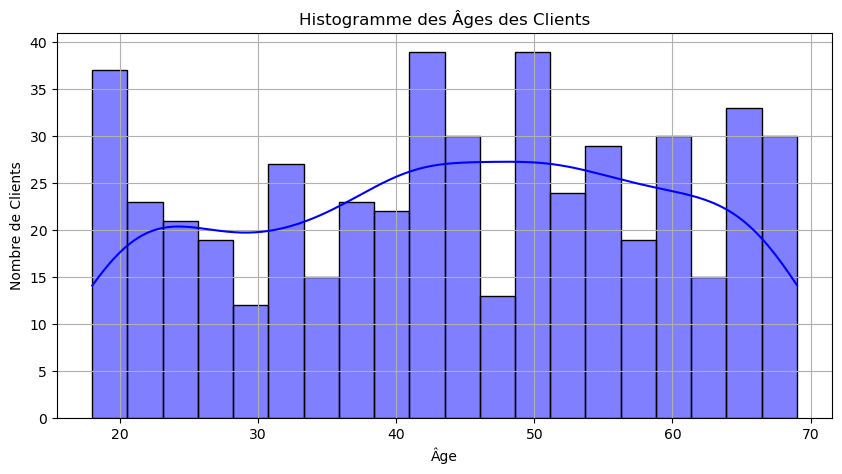

In [9]:
#a. Histogramme de l'Âge

plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], bins=20, kde=True, color='blue')
plt.title('Histogramme des Âges des Clients')
plt.xlabel('Âge')
plt.ylabel('Nombre de Clients')
plt.grid()
plt.show()

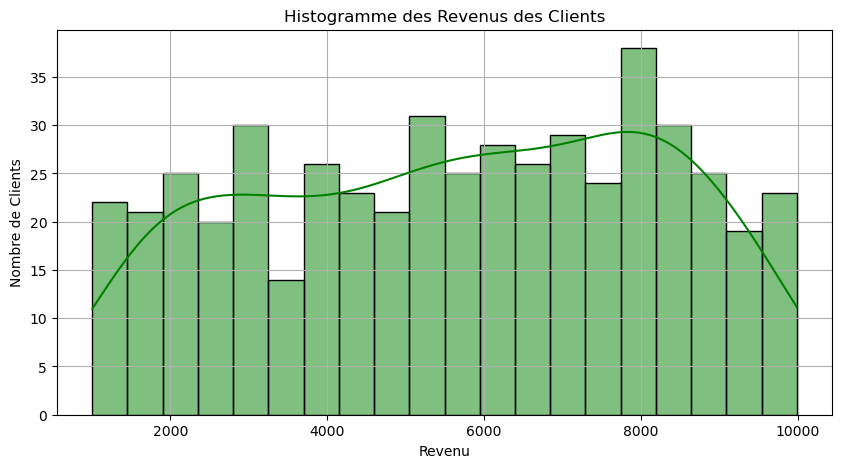

In [10]:
#b. Histogramme du Revenu

plt.figure(figsize=(10, 5))
sns.histplot(data['Revenu'], bins=20, kde=True, color='green')
plt.title('Histogramme des Revenus des Clients')
plt.xlabel('Revenu')
plt.ylabel('Nombre de Clients')
plt.grid()
plt.show()

/var/folders/jp/f47cgj055sj565h3fpzwgz840000gn/T/ipykernel_10130/2040985980.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Resilie', y='Score_satisfaction', data=data, palette='Set2')


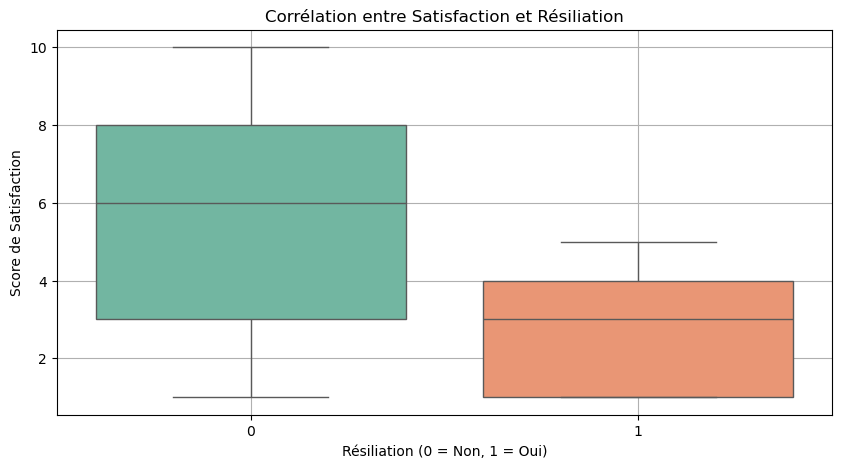

In [11]:
#Corrélation entre Satisfaction et Résiliation

plt.figure(figsize=(10, 5))
sns.boxplot(x='Resilie', y='Score_satisfaction', data=data, palette='Set2')
plt.title('Corrélation entre Satisfaction et Résiliation')
plt.xlabel('Résiliation (0 = Non, 1 = Oui)')
plt.ylabel('Score de Satisfaction')
plt.grid()
plt.show()

In [12]:
# Séparer les features et la cible
X = data.drop(columns=['Resilie'])  # Toutes les colonnes sauf 'Resilie'
y = data['Resilie']  # La colonne cible

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Vérifier les tailles des ensembles
print(f"Taille de l'ensemble d'entraînement : {X_train.shape[0]}")
print(f"Taille de l'ensemble de test : {X_test.shape[0]}")

Taille de l'ensemble d'entraînement : 400
Taille de l'ensemble de test : 100


In [16]:
# Modèle de Régression Logistique
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Régression Logistique")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print(f"Précision : {accuracy_score(y_test, y_pred_log):.2f}\n")

Régression Logistique
[[93  3]
 [ 0  4]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        96
           1       0.57      1.00      0.73         4

    accuracy                           0.97       100
   macro avg       0.79      0.98      0.86       100
weighted avg       0.98      0.97      0.97       100

Précision : 0.97



In [17]:
# Modèle d'Arbre de Décision
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("Arbre de Décision")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
print(f"Précision : {accuracy_score(y_test, y_pred_tree):.2f}\n")

Arbre de Décision
[[96  0]
 [ 0  4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00         4

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Précision : 1.00



In [18]:
# Modèle K-plus Proches Voisins (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("K-plus Proches Voisins (KNN)")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print(f"Précision : {accuracy_score(y_test, y_pred_knn):.2f}\n")

K-plus Proches Voisins (KNN)
[[96  0]
 [ 4  0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        96
           1       0.00      0.00      0.00         4

    accuracy                           0.96       100
   macro avg       0.48      0.50      0.49       100
weighted avg       0.92      0.96      0.94       100

Précision : 0.96



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [39]:
#feature engineering

scaler = StandardScaler()

data['Anciennete_Revenu'] = data['Anciennete'] * data['Revenu']

# Répéter le processus d'encodage et de séparation
X = data.drop(columns=['Resilie'])
y = data['Resilie']

In [22]:
# Appliquer PCA
pca = PCA(n_components=0.95)  # Conserver 95% de la variance
X_pca = pca.fit_transform(X)

# Diviser les données comme précédemment
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

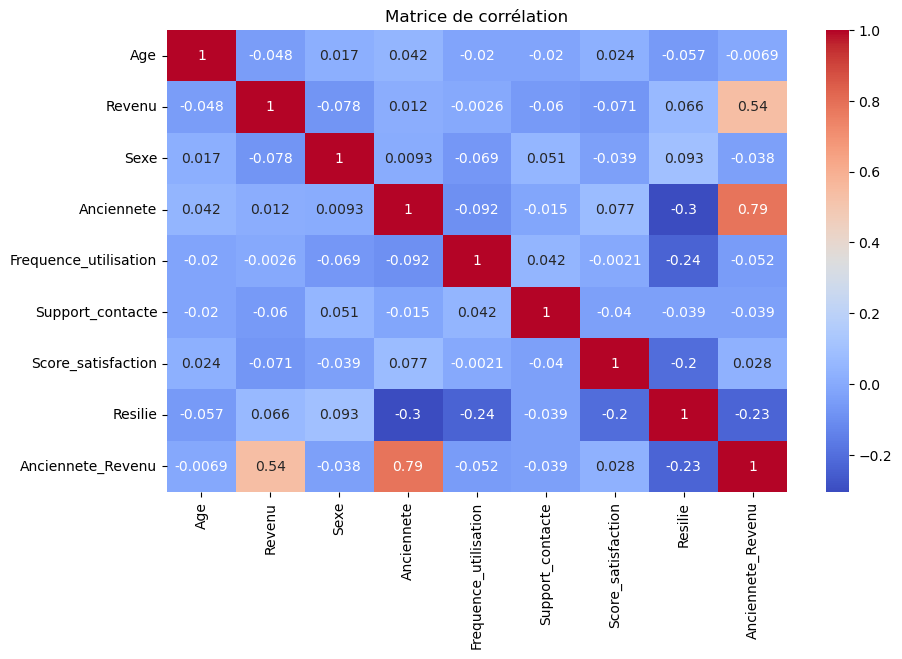

In [23]:

# Matrice de corrélation
corr_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

In [ ]:

from sklearn.model_selection import learning_curve
# ----------------------------
# Modélisation
# ----------------------------
# Séparation des données
X = data.drop('Resilie', axis=1)
y = data['Resilie']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fonction d'évaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Précision : {accuracy_score(y_test, y_pred):.2f}")
    print(f"Rappel : {recall_score(y_test, y_pred):.2f}")
    print(f"F1-score : {f1_score(y_test, y_pred):.2f}")
    
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title('Matrice de confusion')
    plt.show()

In [31]:


# ----------------------------
#  Optimisation du modèle
# ----------------------------
# Validation croisée pour l'arbre
scores = cross_val_score(tree_model, X, y, cv=5, scoring='f1')
print(f"\nF1-score moyen (CV) : {np.mean(scores):.2f} ± {np.std(scores):.2f}")

# GridSearch pour l'arbre
params = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(tree_model, params, cv=5, scoring='f1')
grid.fit(X, y)
print(f"\nMeilleurs paramètres : {grid.best_params_}")
print(f"Meilleur F1-score : {grid.best_score_:.2f}")


F1-score moyen (CV) : 1.00 ± 0.00

Meilleurs paramètres : {'max_depth': 3, 'min_samples_split': 2}
Meilleur F1-score : 1.00


In [32]:
# ----------------------------
#  Interprétation
# ----------------------------
# Importance des caractéristiques
dt_optimized = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_optimized.fit(X_train, y_train)

features = X.columns
importances = dt_optimized.feature_importances_
pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values('Importance', ascending=False)


,Feature,Importance
4,Frequence_utilisation,0.557021
6,Score_satisfaction,0.234535
3,Anciennete,0.208443
0,Age,0.000000
2,Sexe,0.000000
1,Revenu,0.000000
5,Support_contacte,0.000000
7,Anciennete_Revenu,0.000000


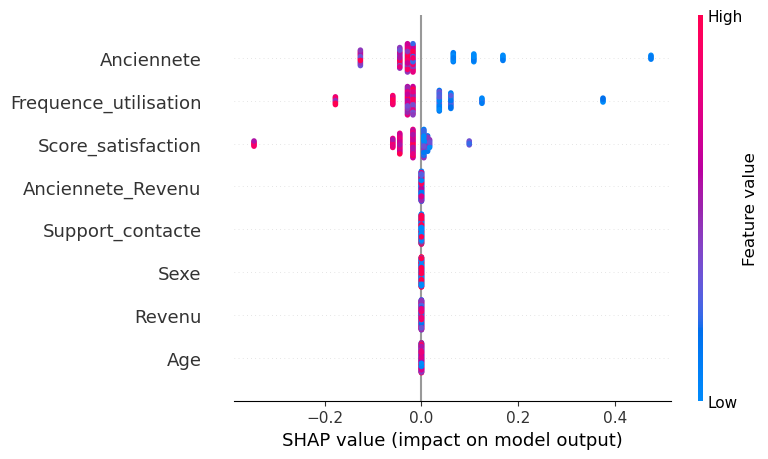

In [33]:
# Exemple SHAP
explainer = shap.TreeExplainer(dt_optimized)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[:, :, 1], X_test, feature_names=features)

In [42]:
# -------------------------------------------------
# Export du modèle et des préprocesseurs
# -------------------------------------------------
import joblib

# Sauvegarder le modèle et les données
joblib.dump(dt_optimized, "model.pkl")
data.to_csv('processed_data.csv', index=False)

# Sauvegarder le scaler (si vous avez normalisé les données)
joblib.dump(scaler, "scaler.pkl")

# Sauvegarder les encodeurs (si vous avez des variables catégorielles)
joblib.dump(le, "label_encoder.pkl")

print("Export du modèle et des préprocesseurs effectués avec succès!")

Export du modèle et des préprocesseurs effectués avec succès!
